In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
x1 = np.random.rand(100)
y1 = np.random.rand(100)
x2 = np.random.rand(100) + 0.5
y2 = np.random.rand(100) + 0.5

In [3]:
data = pd.DataFrame(
    {
        'x': np.concatenate([x1,x2]),
        'y': np.concatenate([y1,y2])
    }
)

In [4]:
data.head()

,x,y
0,0.954405,0.432292
1,0.029710,0.371477
2,0.812731,0.111866
3,0.061118,0.272518
4,0.559990,0.711556


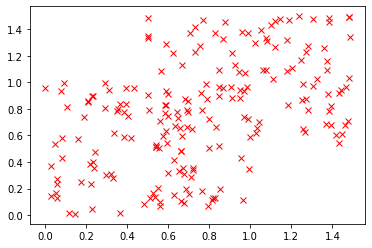

In [5]:
plt.plot(data.x,data.y,'rx')

In [15]:
cls = 5

centroids = np.random.rand(cls,2) * 1.5

for k in range(20):
    clusters = []
    for i in range(len(data)):
        r = []
        for j in range(cls):
            r0 = (data.x.values[i] - centroids[j,0])**2
            r0 += (data.y.values[i] - centroids[j,1])**2
            r.append(np.sqrt(r0))
        clusters.append(np.argmin(r))

    data['cluster'] = clusters

    for j in range(cls):
        centroids[j,0] = np.mean(data[data.cluster == j].x)
        centroids[j,1] = np.mean(data[data.cluster == j].y)

In [16]:
pd.unique(data.cluster)

array([1, 2, 4, 3, 0])

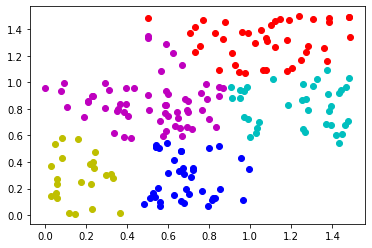

In [17]:
for j in range(10):
    temp = data[data.cluster == j]
    if j == 0:
        plt.plot(temp.x,temp.y,'ro')
    if j == 1:
        plt.plot(temp.x,temp.y,'bo')    
    if j == 2:
        plt.plot(temp.x,temp.y,'yo')    
    if j == 3:
        plt.plot(temp.x,temp.y,'co')
    if j == 4:
        plt.plot(temp.x,temp.y,'mo')        
    if j == 5:
        plt.plot(temp.x,temp.y,'go')
    if j == 6:
        plt.plot(temp.x,temp.y,'rx')    
    if j == 7:
        plt.plot(temp.x,temp.y,'bx')    
    if j == 8:
        plt.plot(temp.x,temp.y,'gx')
    if j == 9:
        plt.plot(temp.x,temp.y,'yx')         

In [32]:
import matplotlib.image as im
from sklearn.cluster import KMeans

In [33]:
img = im.imread('123.jpeg')

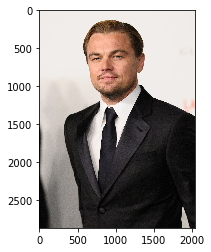

In [34]:
plt.imshow(img)

In [38]:
img.shape

(2860, 2048, 3)

In [39]:
data = img.reshape([2860*2048,3])

In [40]:
data

array([[239, 236, 229],
       [239, 236, 229],
       [239, 236, 229],
       ...,
       [ 16,  16,  18],
       [ 14,  14,  16],
       [ 13,  13,  15]], dtype=uint8)

In [51]:
model = KMeans(n_clusters=5, n_init=3)

In [52]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=3, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
pred = model.predict(data)

In [54]:
pred = pred.reshape([2860,2048])

In [55]:
clusters = {}

for i in range(5):
    clusters[i] = [np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256)]

In [56]:
img2 = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img2[i,j,:] = clusters[pred[i,j]]

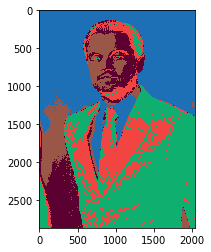

In [57]:
plt.imshow(img2)

In [58]:
clusters

{0: [30, 112, 182],
 1: [242, 69, 66],
 2: [91, 0, 48],
 3: [154, 87, 71],
 4: [14, 175, 111]}

In [62]:
img2 = img.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if pred[i,j] == 0 and i<1200:
            img2[i,j,:] = [255,255,255]

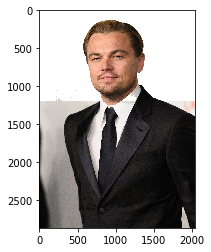

In [63]:
plt.imshow(img2)